In [1]:
!pip install pandas numpy scikit-learn openpyxl joblib matplotlib


   -------------------------------------- 251.3/251.3 kB 811.8 kB/s eta 0:00:00


Columns available: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

📊 Model Evaluation:
MAE  = 35.829
RMSE = 97.743
R²   = 0.681

✅ Model and predictions saved successfully!
Files saved: trained_pipeline.joblib, predictions.xlsx


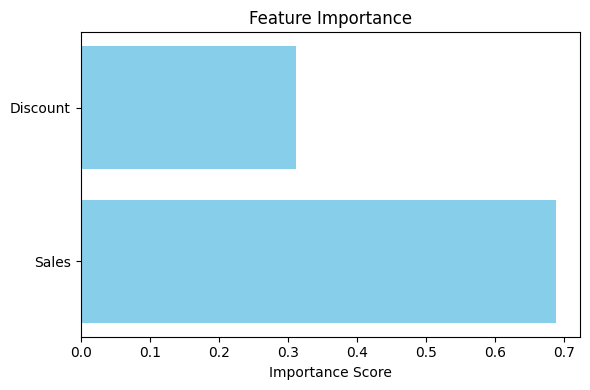

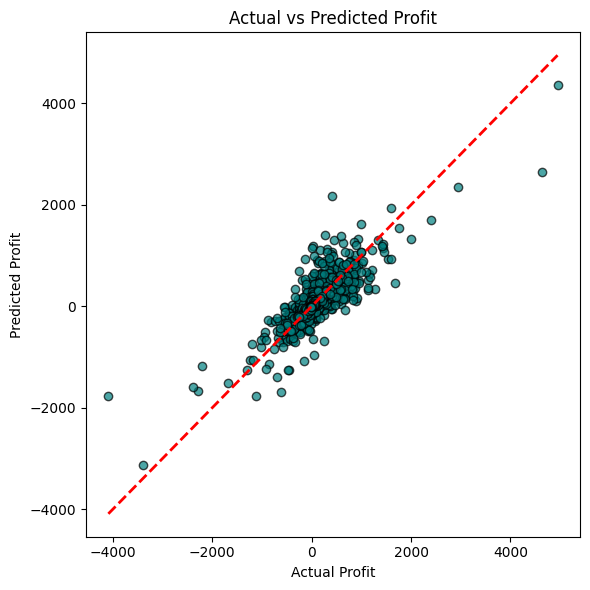

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib

# Display plots inline
%matplotlib inline

# --------------------------
# Load Excel file
# --------------------------
df = pd.read_excel("superstore.xlsx")

print("Columns available:", df.columns.tolist())

# --------------------------
# Select features and target
# --------------------------
features = ["Sales", "Discount"]  # you can modify this
target = "Profit"

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

# --------------------------
# Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# Preprocessing + Model
# --------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, features)]
)

model = RandomForestRegressor(
    n_estimators=200, random_state=42, n_jobs=-1
)

pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

# --------------------------
# Train model
# --------------------------
pipe.fit(X_train, y_train)

# --------------------------
# Predictions
# --------------------------
y_pred = pipe.predict(X_test)

# --------------------------
# Evaluation
# --------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print(f"MAE  = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"R²   = {r2:.3f}")

# --------------------------
# Save model and predictions
# --------------------------
joblib.dump(pipe, "trained_pipeline.joblib")

output = X_test.copy()
output["Actual_Profit"] = y_test
output["Predicted_Profit"] = y_pred
output.to_excel("predictions.xlsx", index=False)

print("\n✅ Model and predictions saved successfully!")
print("Files saved: trained_pipeline.joblib, predictions.xlsx")

# --------------------------
# Feature Importance Plot
# --------------------------
rf_model = pipe.named_steps["model"]
importances = rf_model.feature_importances_

plt.figure(figsize=(6,4))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# --------------------------
# Scatter Plot: Actual vs Predicted
# --------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="teal", edgecolors="k")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)
plt.tight_layout()
plt.show()
